# Creating combined AGAGE files

Before you run this tutorial, make sure you've run the setup script to create your config file.

In [4]:
from agage_archive.io import read_agage, read_ale_gage, output_dataset, combine_datasets

To read AGAGE netCDF files, use the read_agage function. E.g.:

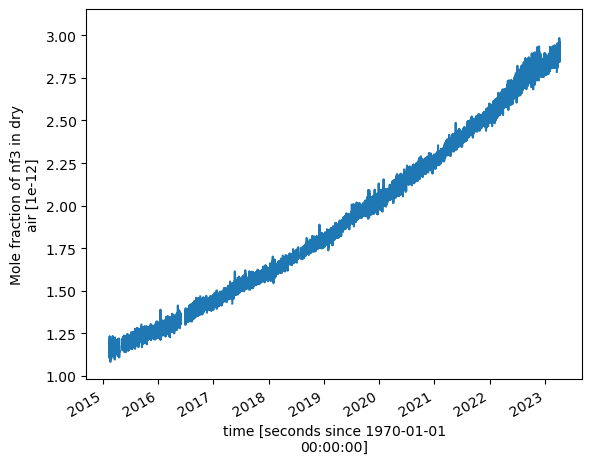

In [5]:
ds_agage = read_agage("NF3", "CGO", "GCMS-Medusa")
ds_agage.mf.plot()

In [6]:
ds_agage

<xarray.Dataset>
Dimensions:           (time: 65411)
Coordinates:
  * time              (time) datetime64[ns] 2004-01-21T00:38:00 ... 2023-04-1...
Data variables:
    mf                (time) float32 nan nan nan nan ... 2.883 2.899 2.887 2.899
    mf_repeatability  (time) float32 nan nan nan nan ... 0.01291 0.01286 0.01383
    inlet_height      (time) int16 10 10 10 10 10 10 10 ... 70 70 70 70 70 70 70
    sampling_period   (time) int16 1200 1200 1200 1200 ... 1200 1200 1200 1200
Attributes: (12/23)
    comment:                    AGAGE GCMS-Medusa measurements. Output from G...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.000000
    ...                         ...
    instrument:                 agilent_5975
    instrument_date:            2012-08-01 00:00:00
    instrument_comment:         upgraded MSD detector with generally improved...
    instrument_1:               agilent_5973
    instrument_date_1:          2004-01-01 00:00:00
    instrument_comment_1:       original MSD detector

Similarly, ALE or GAGE data can be read using:

In [7]:
ds_gage = read_ale_gage("CH3CCl3", "CGO", "GAGE")

In [9]:
ds_gage

<xarray.Dataset>
Dimensions:           (time: 50142)
Coordinates:
  * time              (time) datetime64[ns] 1981-11-30T13:01:00 ... 1994-12-2...
Data variables:
    mf                (time) float32 nan nan nan nan ... 101.3 101.2 101.7 100.7
    mf_repeatability  (time) float32 nan nan nan nan ... 2.026 2.024 2.034 2.014
    inlet_height      (time) int16 70 70 70 70 70 70 70 ... 70 70 70 70 70 70 70
    sampling_period   (time) int16 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30
Attributes: (12/20)
    comment:                    GAGE CH3CCl3 data from Kennaook/Cape Grim, Ta...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    ...                         ...
    site_code:                  CGO
    network:                    GAGE
    doi:                        
    instrument:                 GAGE_GCMD
    instrument_date:            1981-11-30
    instrument_comment:

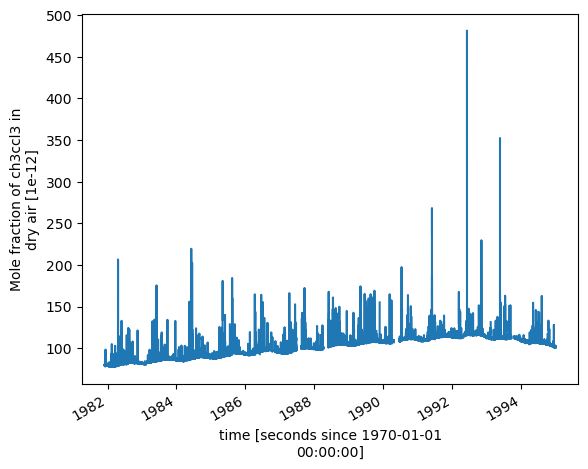

In [10]:
ds_gage.mf.plot()

The ```combine_datasets``` function calls these functions, based on the order in which they are specified in ```data/data_selector.json```.

Here, we will create a CH3CCl3 timeseries from CGO ALE, GAGE, GCMD and Medusa data:

In [42]:
ds = combine_datasets("CH3CCl3", "CGO", scale="SIO-05")

In [43]:
ds

<xarray.Dataset>
Dimensions:           (time: 279035)
Coordinates:
  * time              (time) datetime64[ns] 1978-07-08T05:08:00 ... 2023-04-1...
Data variables:
    mf                (time) float32 nan nan 60.44 60.44 ... 1.019 1.011 nan nan
    mf_repeatability  (time) float32 nan nan 1.192 1.192 ... 0.01572 nan nan
    inlet_height      (time) int16 70 70 70 70 70 70 70 ... 70 70 70 70 70 70 70
    sampling_period   (time) int16 30 30 30 30 30 ... 1200 1200 1200 1200 1200
    instrument_type   (time) int8 0 0 0 0 0 0 0 0 0 0 0 ... 4 4 4 4 4 4 4 4 4 4
Attributes: (12/32)
    comment:                    Combined AGAGE/GAGE/ALE dataset from the foll...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    ...                         ...
    instrument_3:               GAGE_GCMD
    instrument_date_3:          1981-11-30
    instrument_comment_3:       
    instrument_4:               ALE_GCMD
    instrument_date_4:          1978-07-08
    instrument_comment_4:

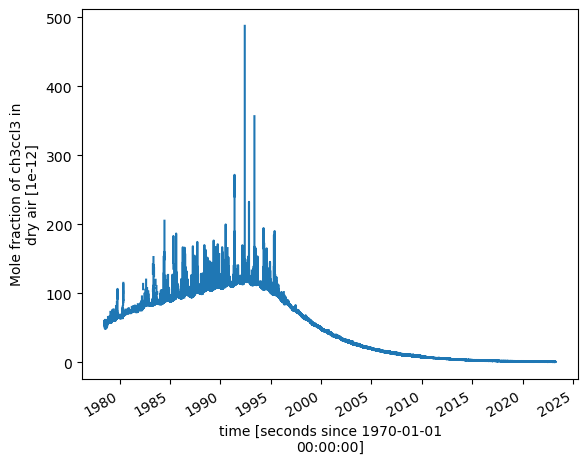

In [44]:
ds.mf.plot()

To output the file to the output directory, use the ```output_dataset``` function:

In [45]:
output_dataset(ds, network="AGAGE", instrument="combined")

Now try a species that's only measured on the Medusa:

In [48]:
ds = combine_datasets("NF3", "CGO", scale=None)

In [49]:
ds

<xarray.Dataset>
Dimensions:           (time: 65411)
Coordinates:
  * time              (time) datetime64[ns] 2004-01-21T00:38:00 ... 2023-04-1...
Data variables:
    mf                (time) float32 nan nan nan nan ... 2.883 2.899 2.887 2.899
    mf_repeatability  (time) float32 nan nan nan nan ... 0.01291 0.01286 0.01383
    inlet_height      (time) int16 10 10 10 10 10 10 10 ... 70 70 70 70 70 70 70
    sampling_period   (time) int16 1200 1200 1200 1200 ... 1200 1200 1200 1200
Attributes: (12/23)
    comment:                    AGAGE GCMS-Medusa measurements. Output from G...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.000000
    ...                         ...
    instrument:                 agilent_5975
    instrument_date:            2012-08-01 00:00:00
    instrument_comment:         upgraded MSD detector with generally improved...
    instrument_1:               agilent_5973
    instrument_date_1:          2004-01-01 00:00:00
    instrument_comment_1:       original MSD detector

In [50]:
output_dataset(ds, network="AGAGE", instrument="GCMS-Medusa")